In [2]:
#Import necessary libraries

import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

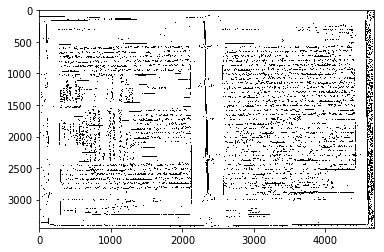

In [3]:
img = cv2.imread('noisy.TIF')
plt.imshow(img, aspect='auto')

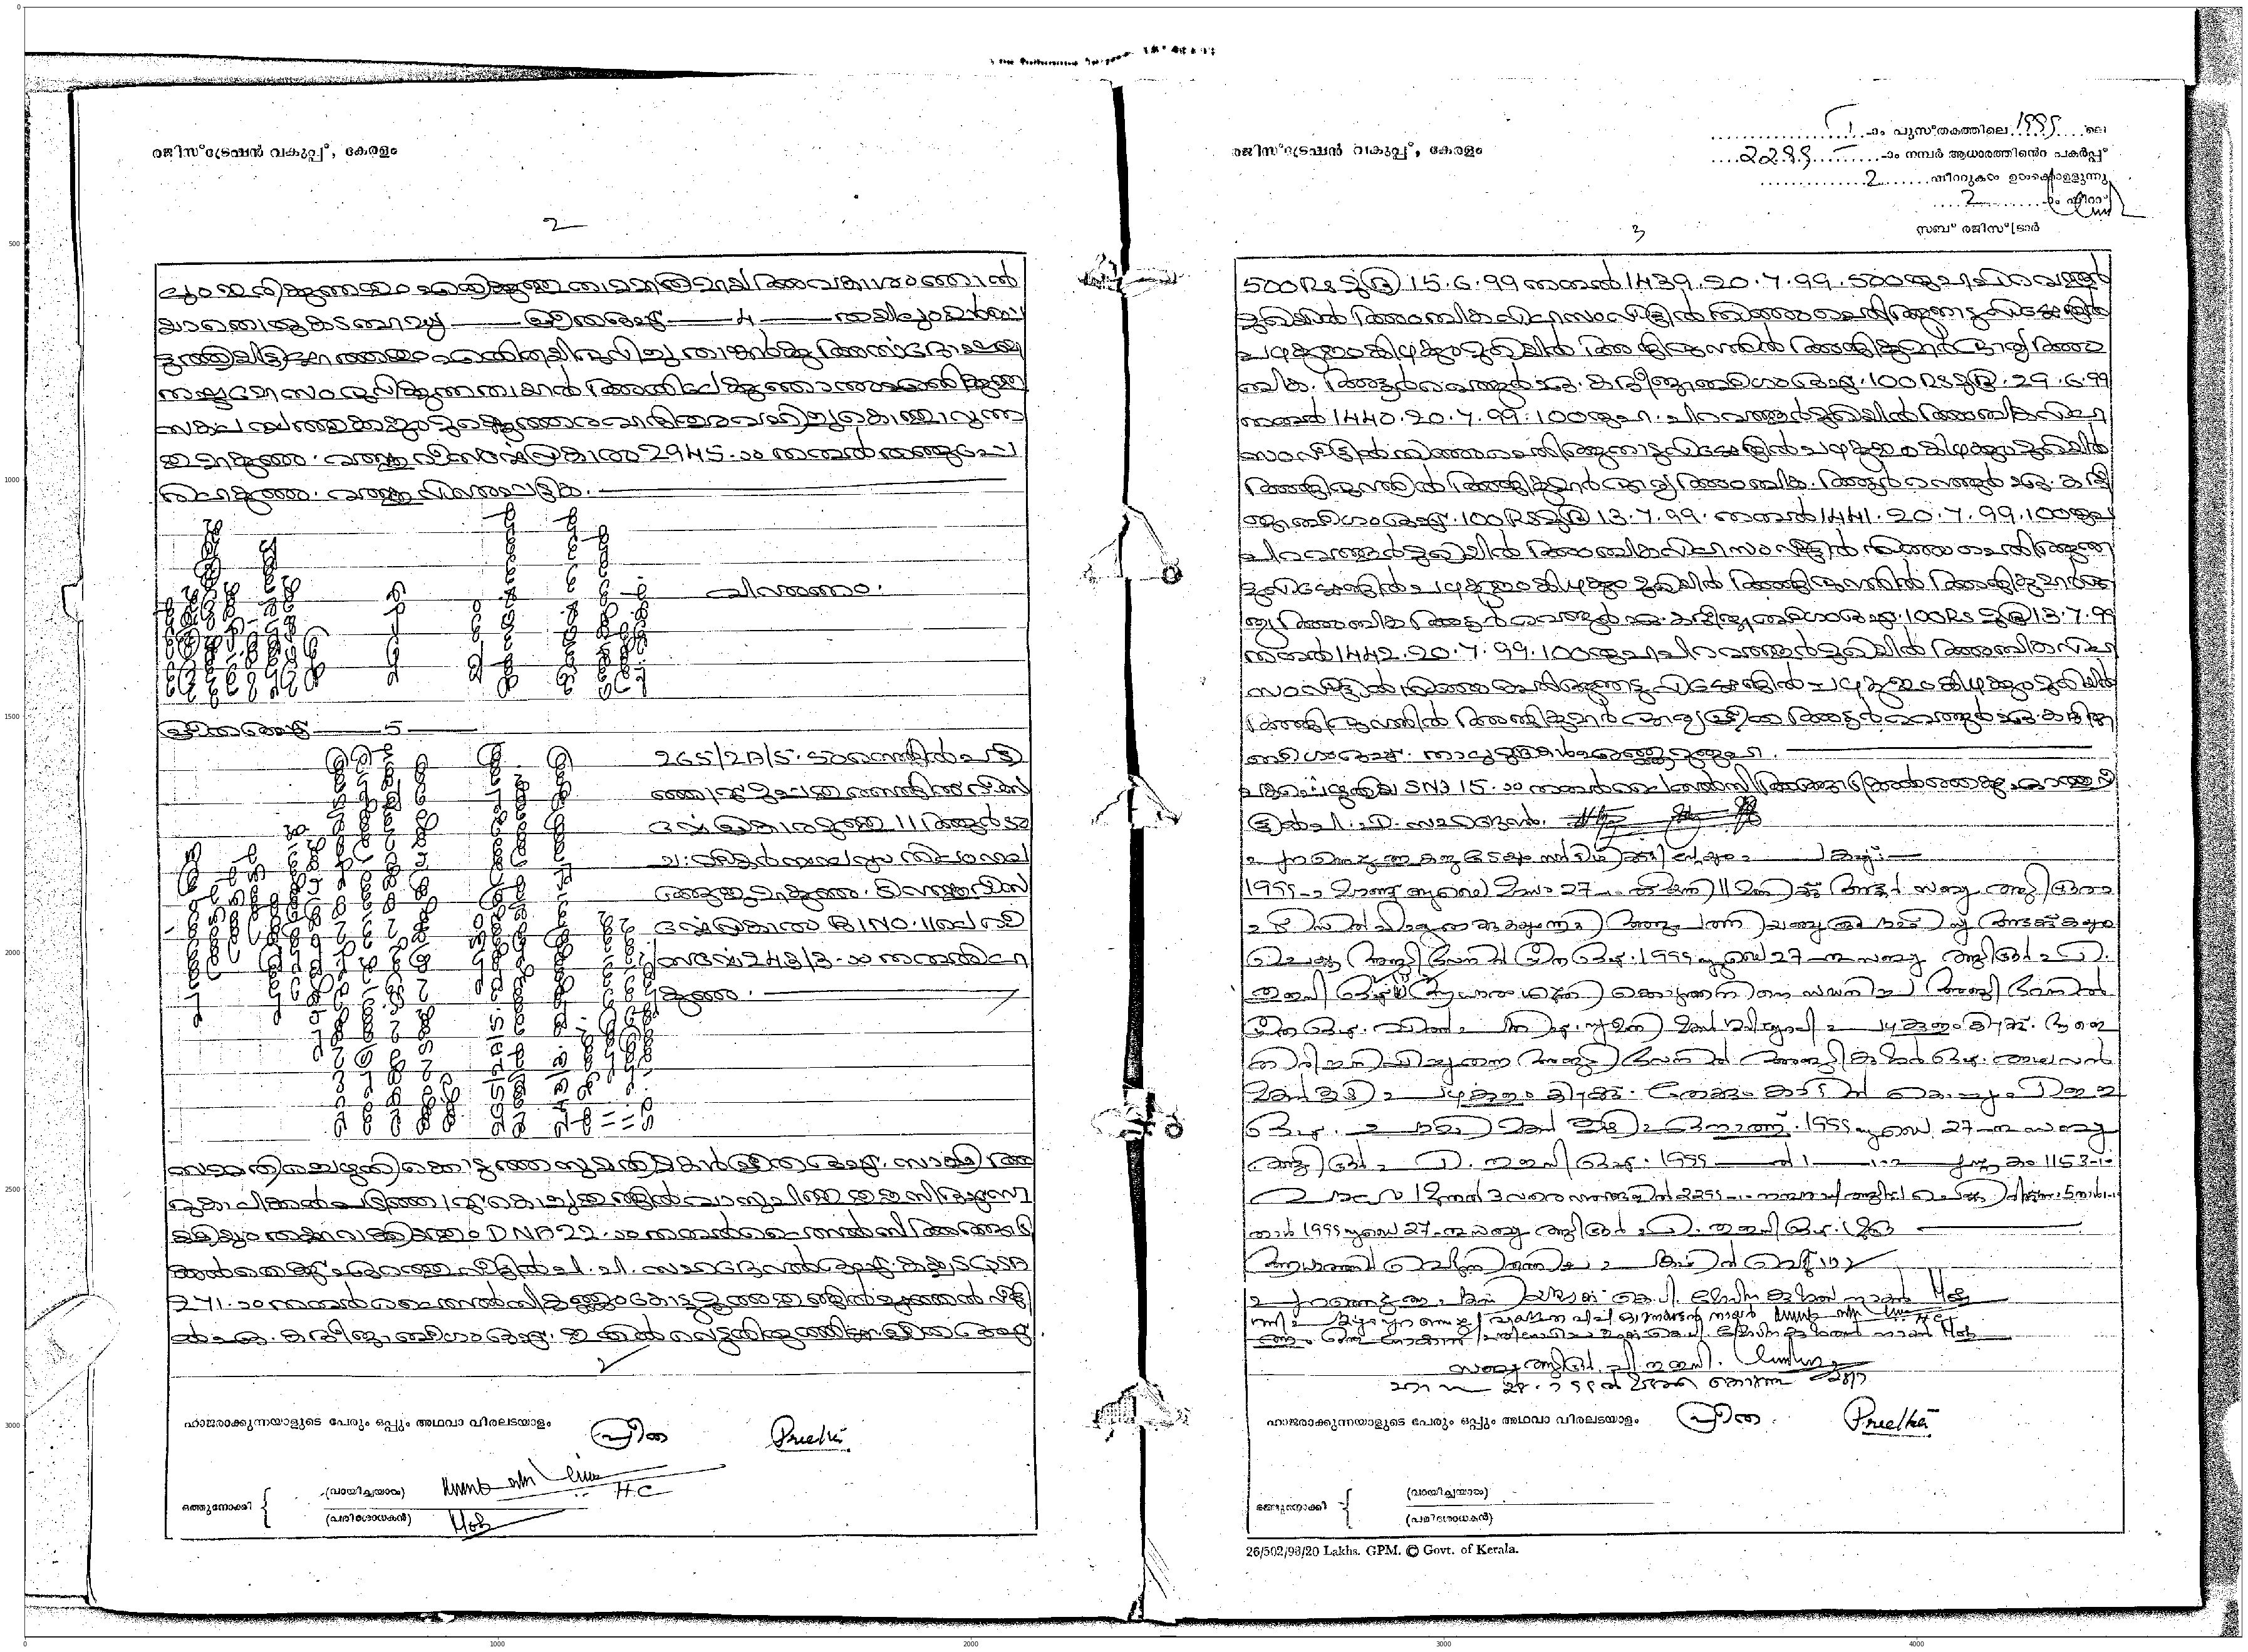

In [4]:
'''To display image scaled up, inorder to detect differences while thresholding'''

dpi = mpl.rcParams['figure.dpi']
height, width, depth = img.shape
# figure size in inches
figsize = width / float(dpi), height / float(dpi)

# Create a figure of the right size with one axes that takes up the full figure
fig = plt.figure(figsize=figsize)
plt.imshow(img)

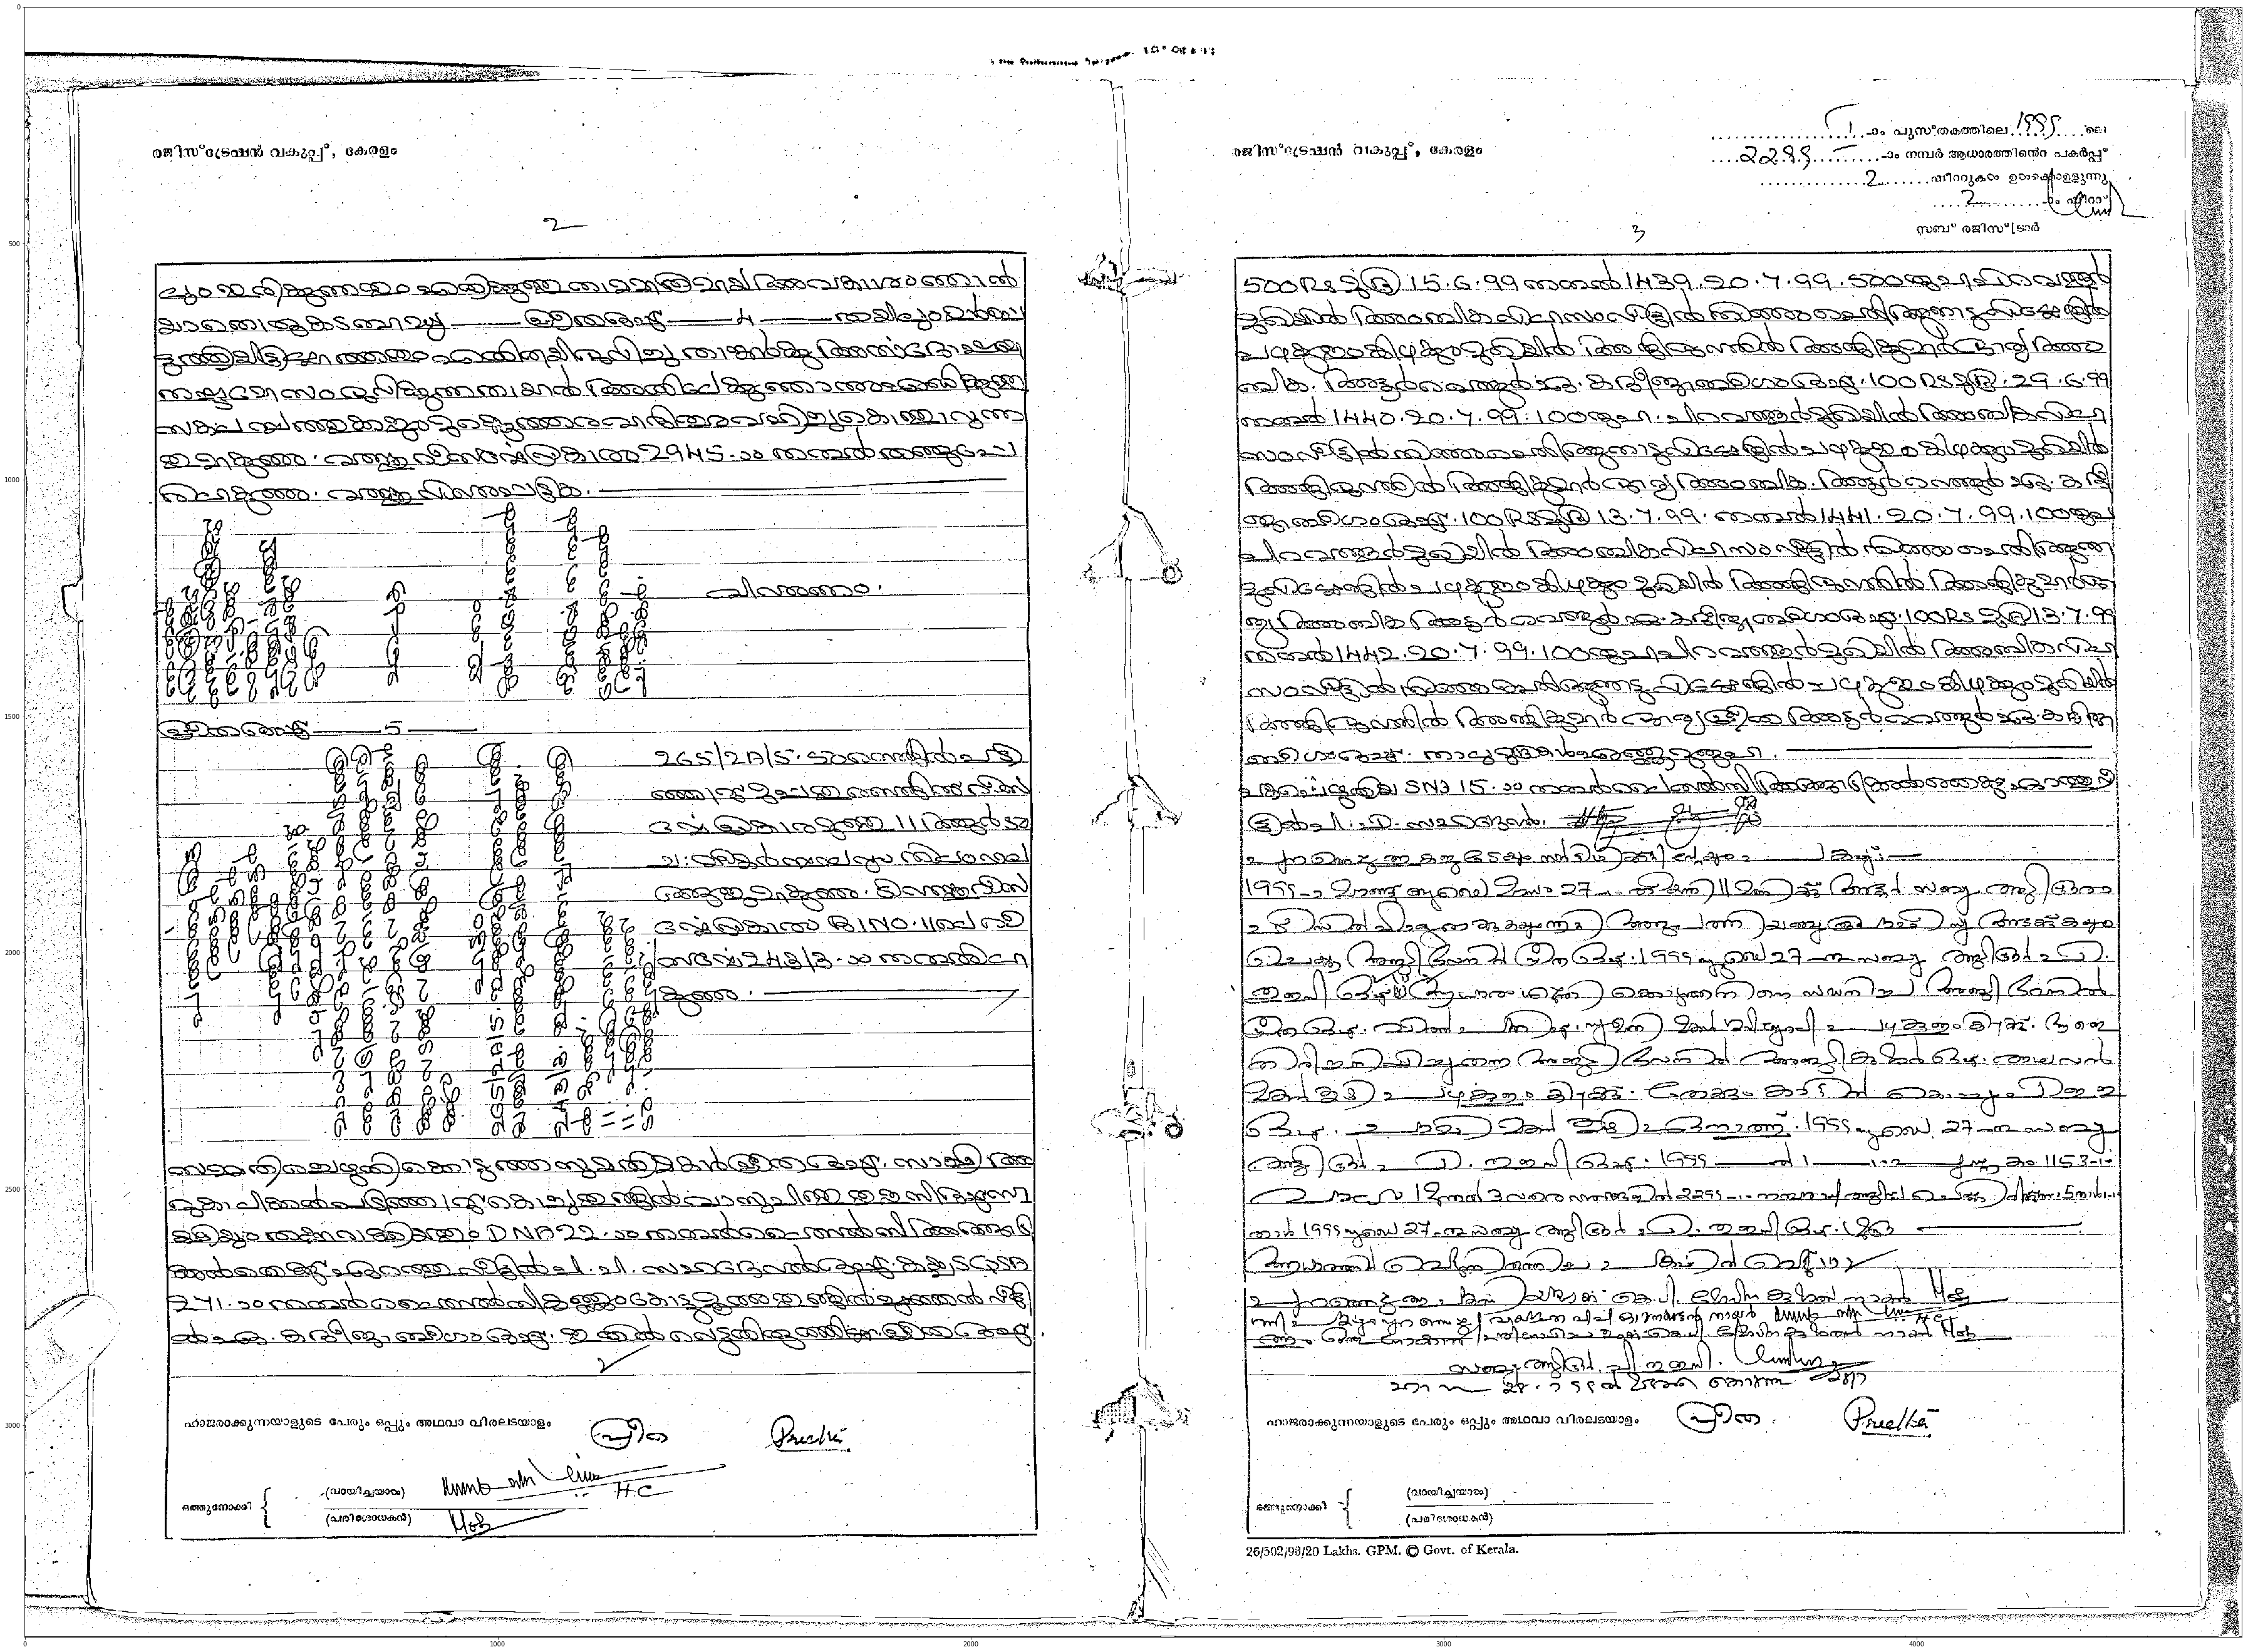

In [6]:
#Converting to greyscale to apply adaptive thresholding
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

denoised1 = cv2.adaptiveThreshold(grey, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 27, 100)

fig = plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(denoised1, cv2.COLOR_BGR2RGB)) 

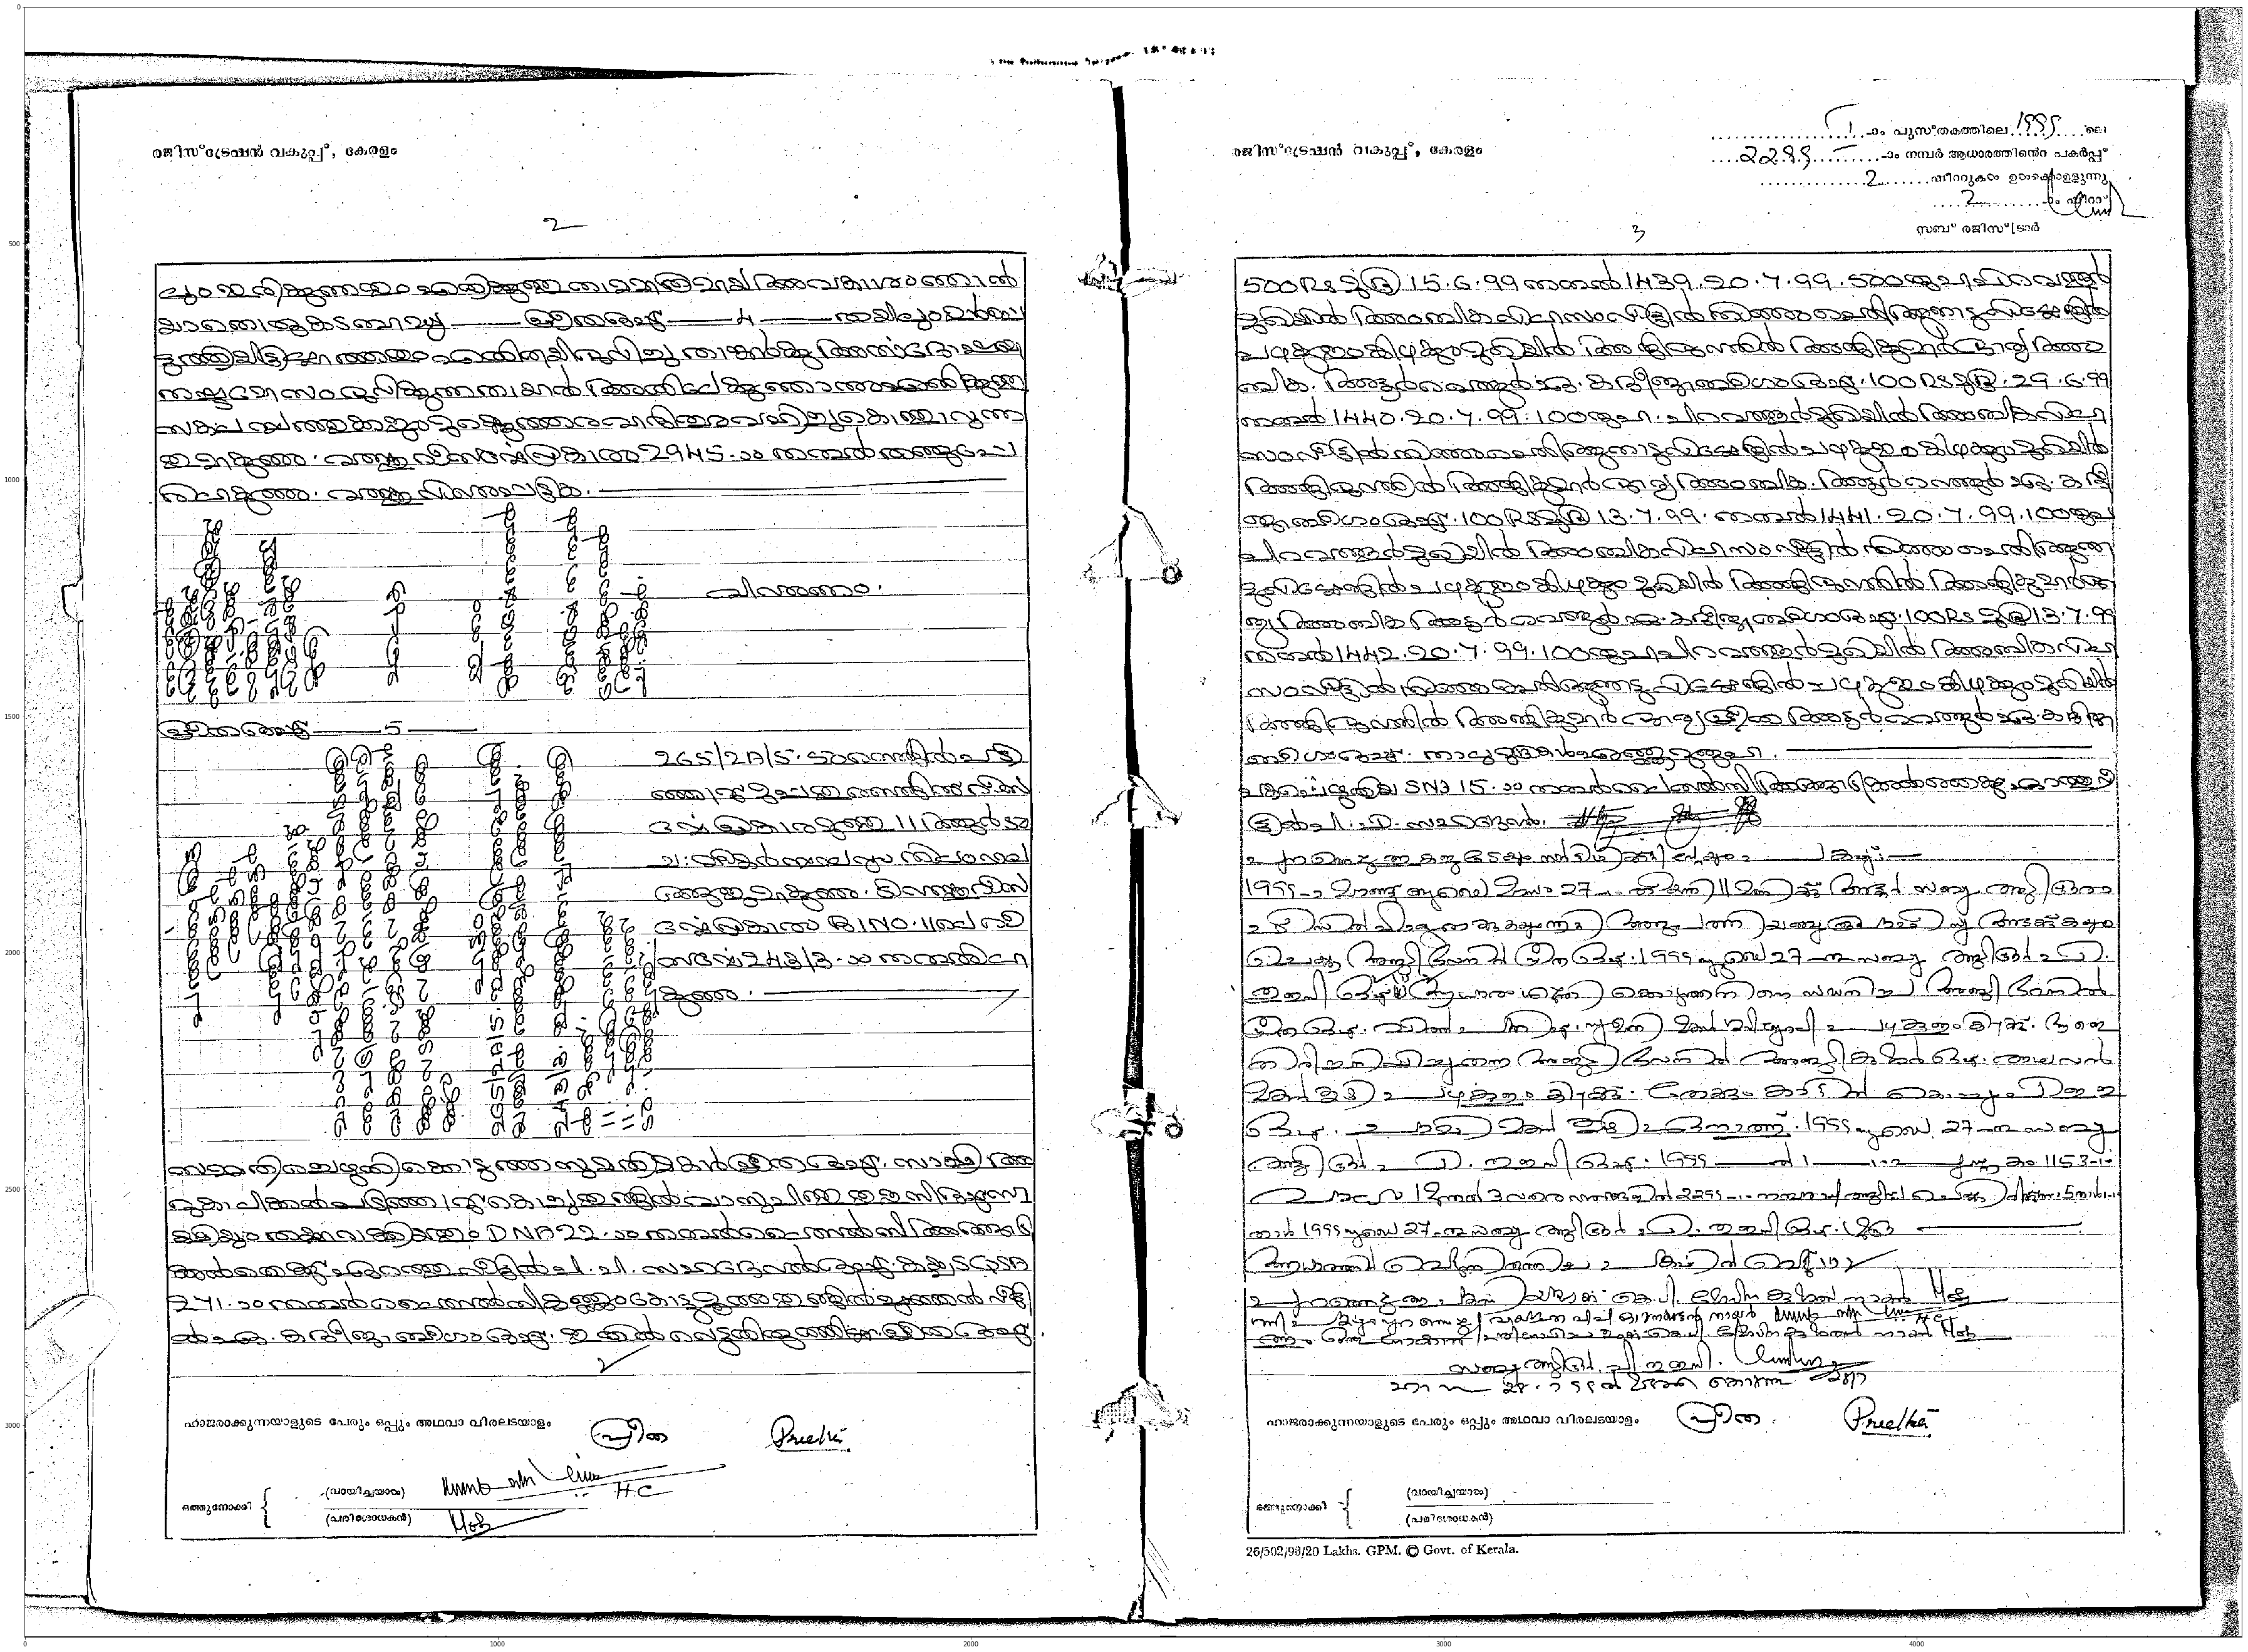

In [6]:
denoised2 = cv2.adaptiveThreshold(grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 20)

fig = plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(denoised2, cv2.COLOR_BGR2RGB)) 

# Non-Local Means Denoising

The Adaptive Thresholding methods do not seem to be removing sufficient noise. 
We apply Non-Local Means Denoising. 
Takes more time, relatively better results. 

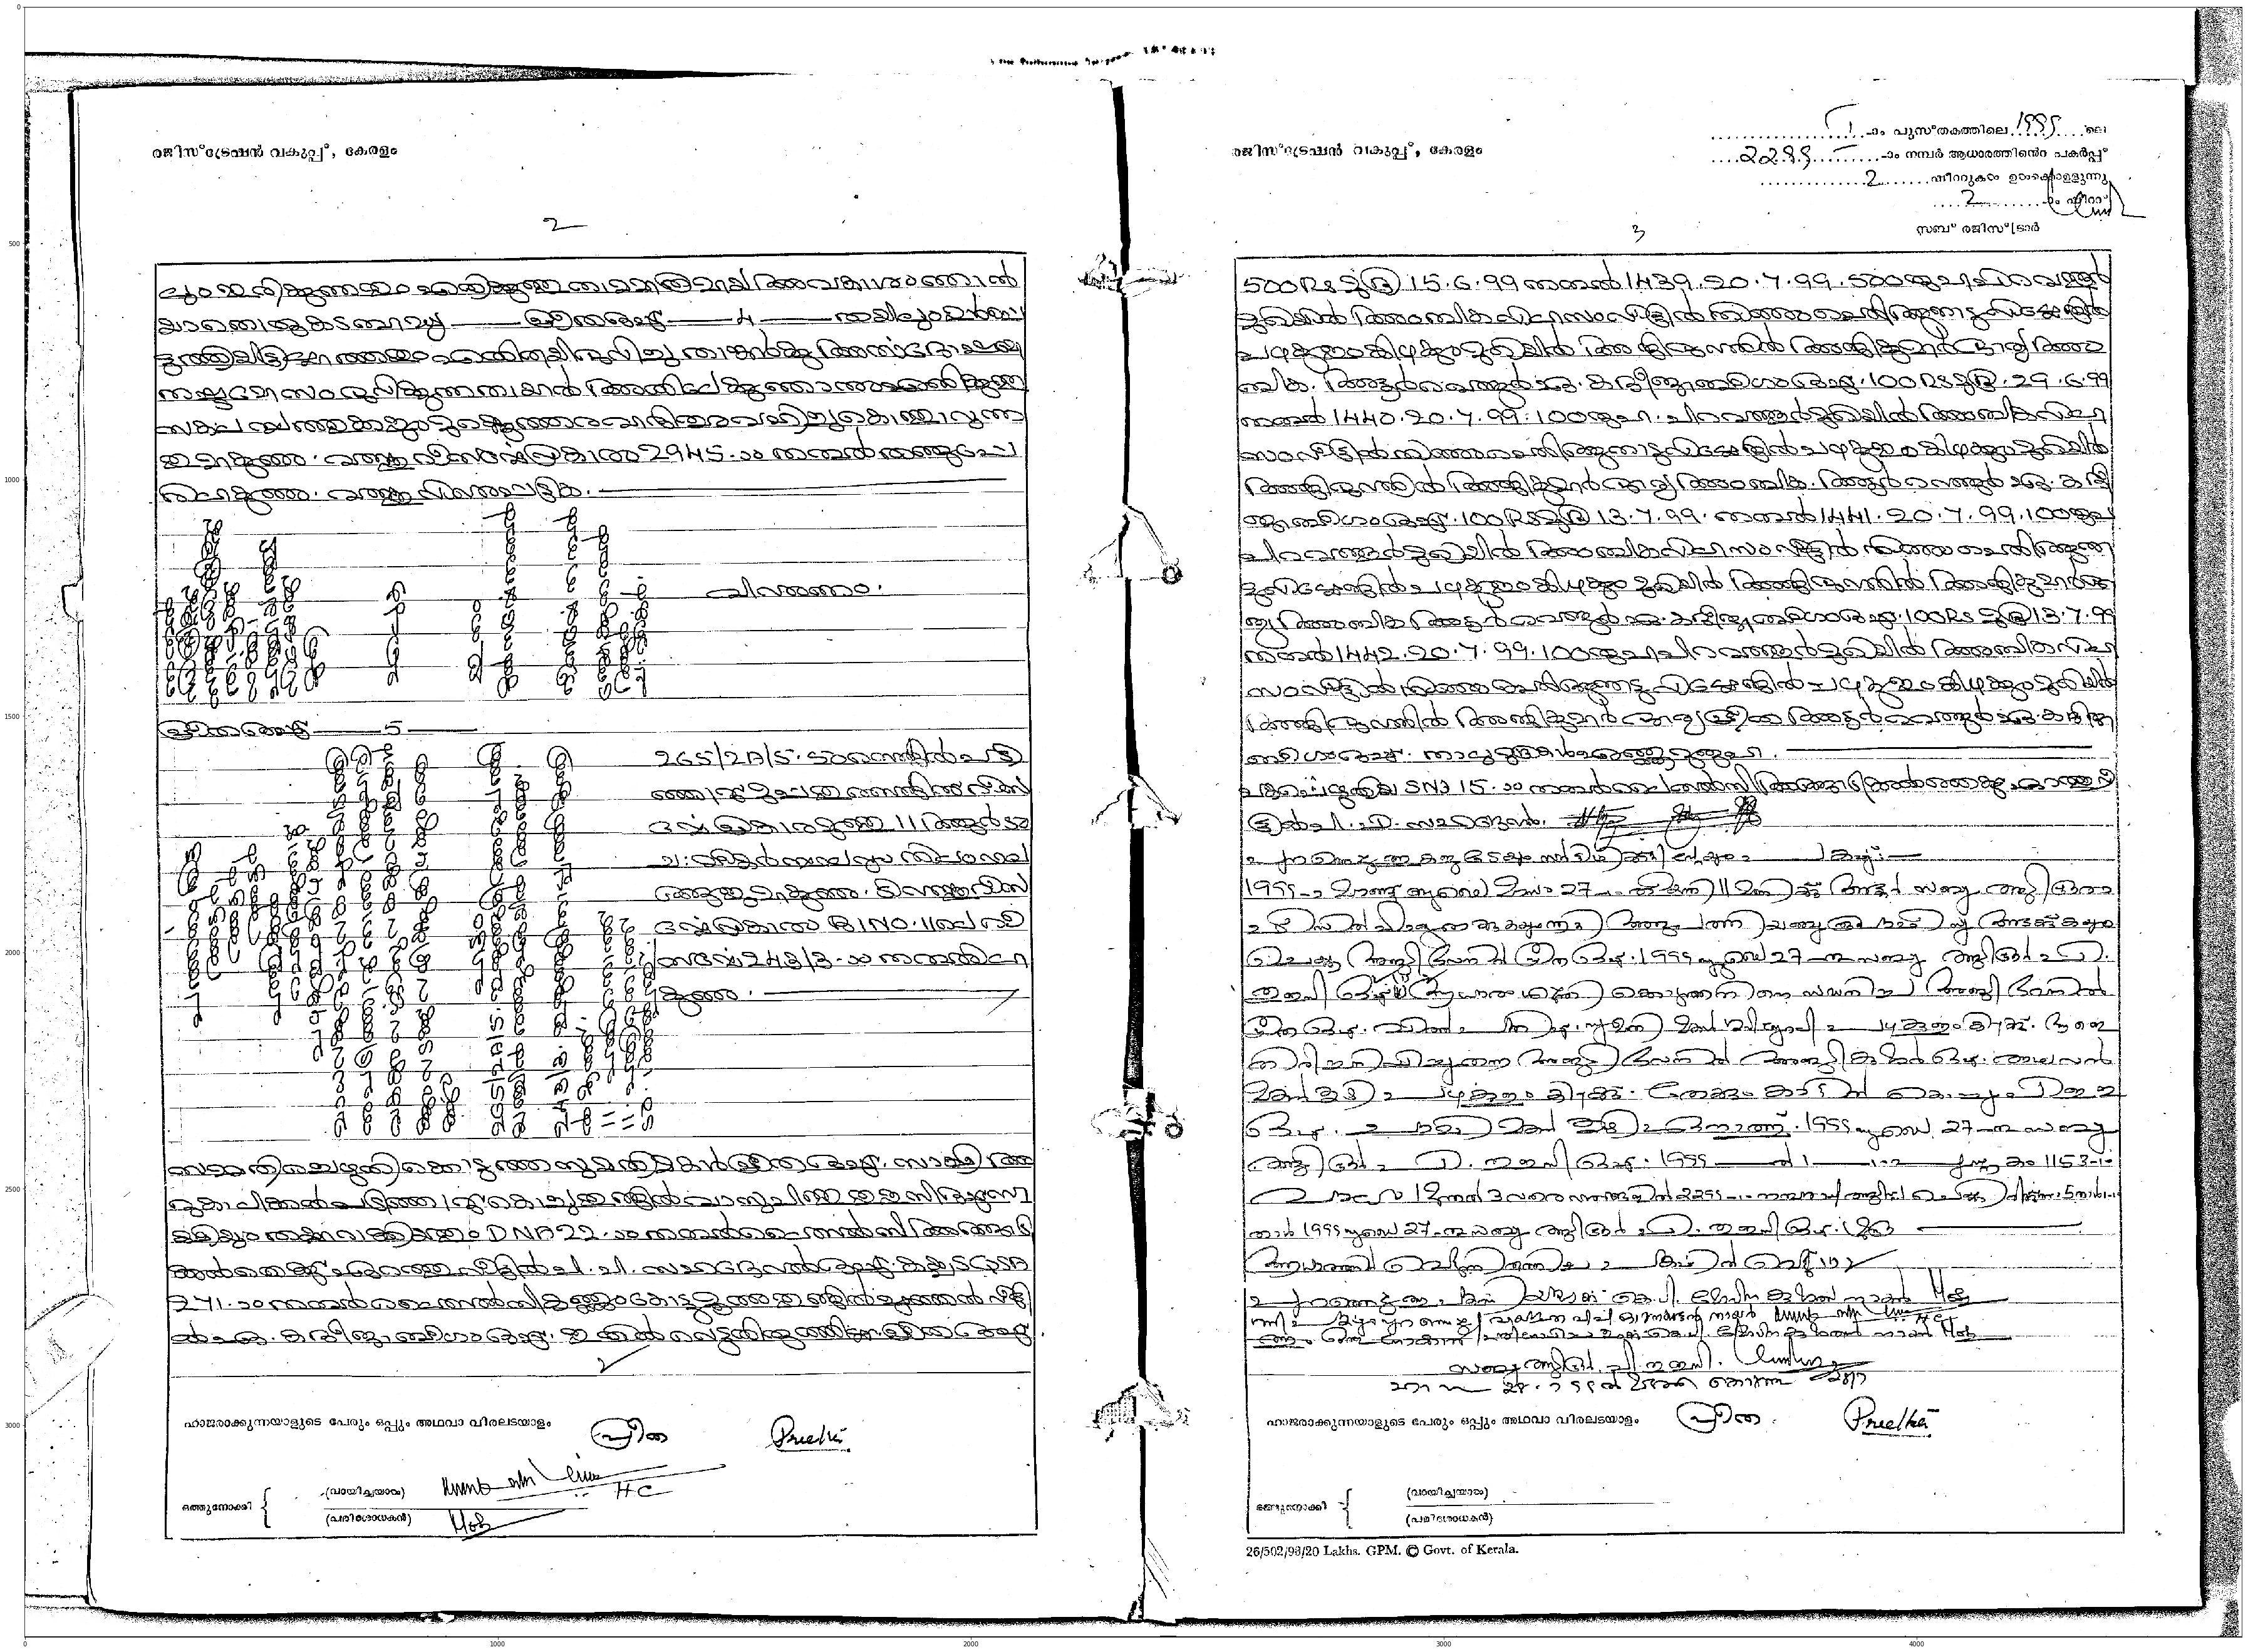

In [8]:
fig = plt.figure(figsize=figsize)
dst = cv2.fastNlMeansDenoising(grey,None,30,7,21)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


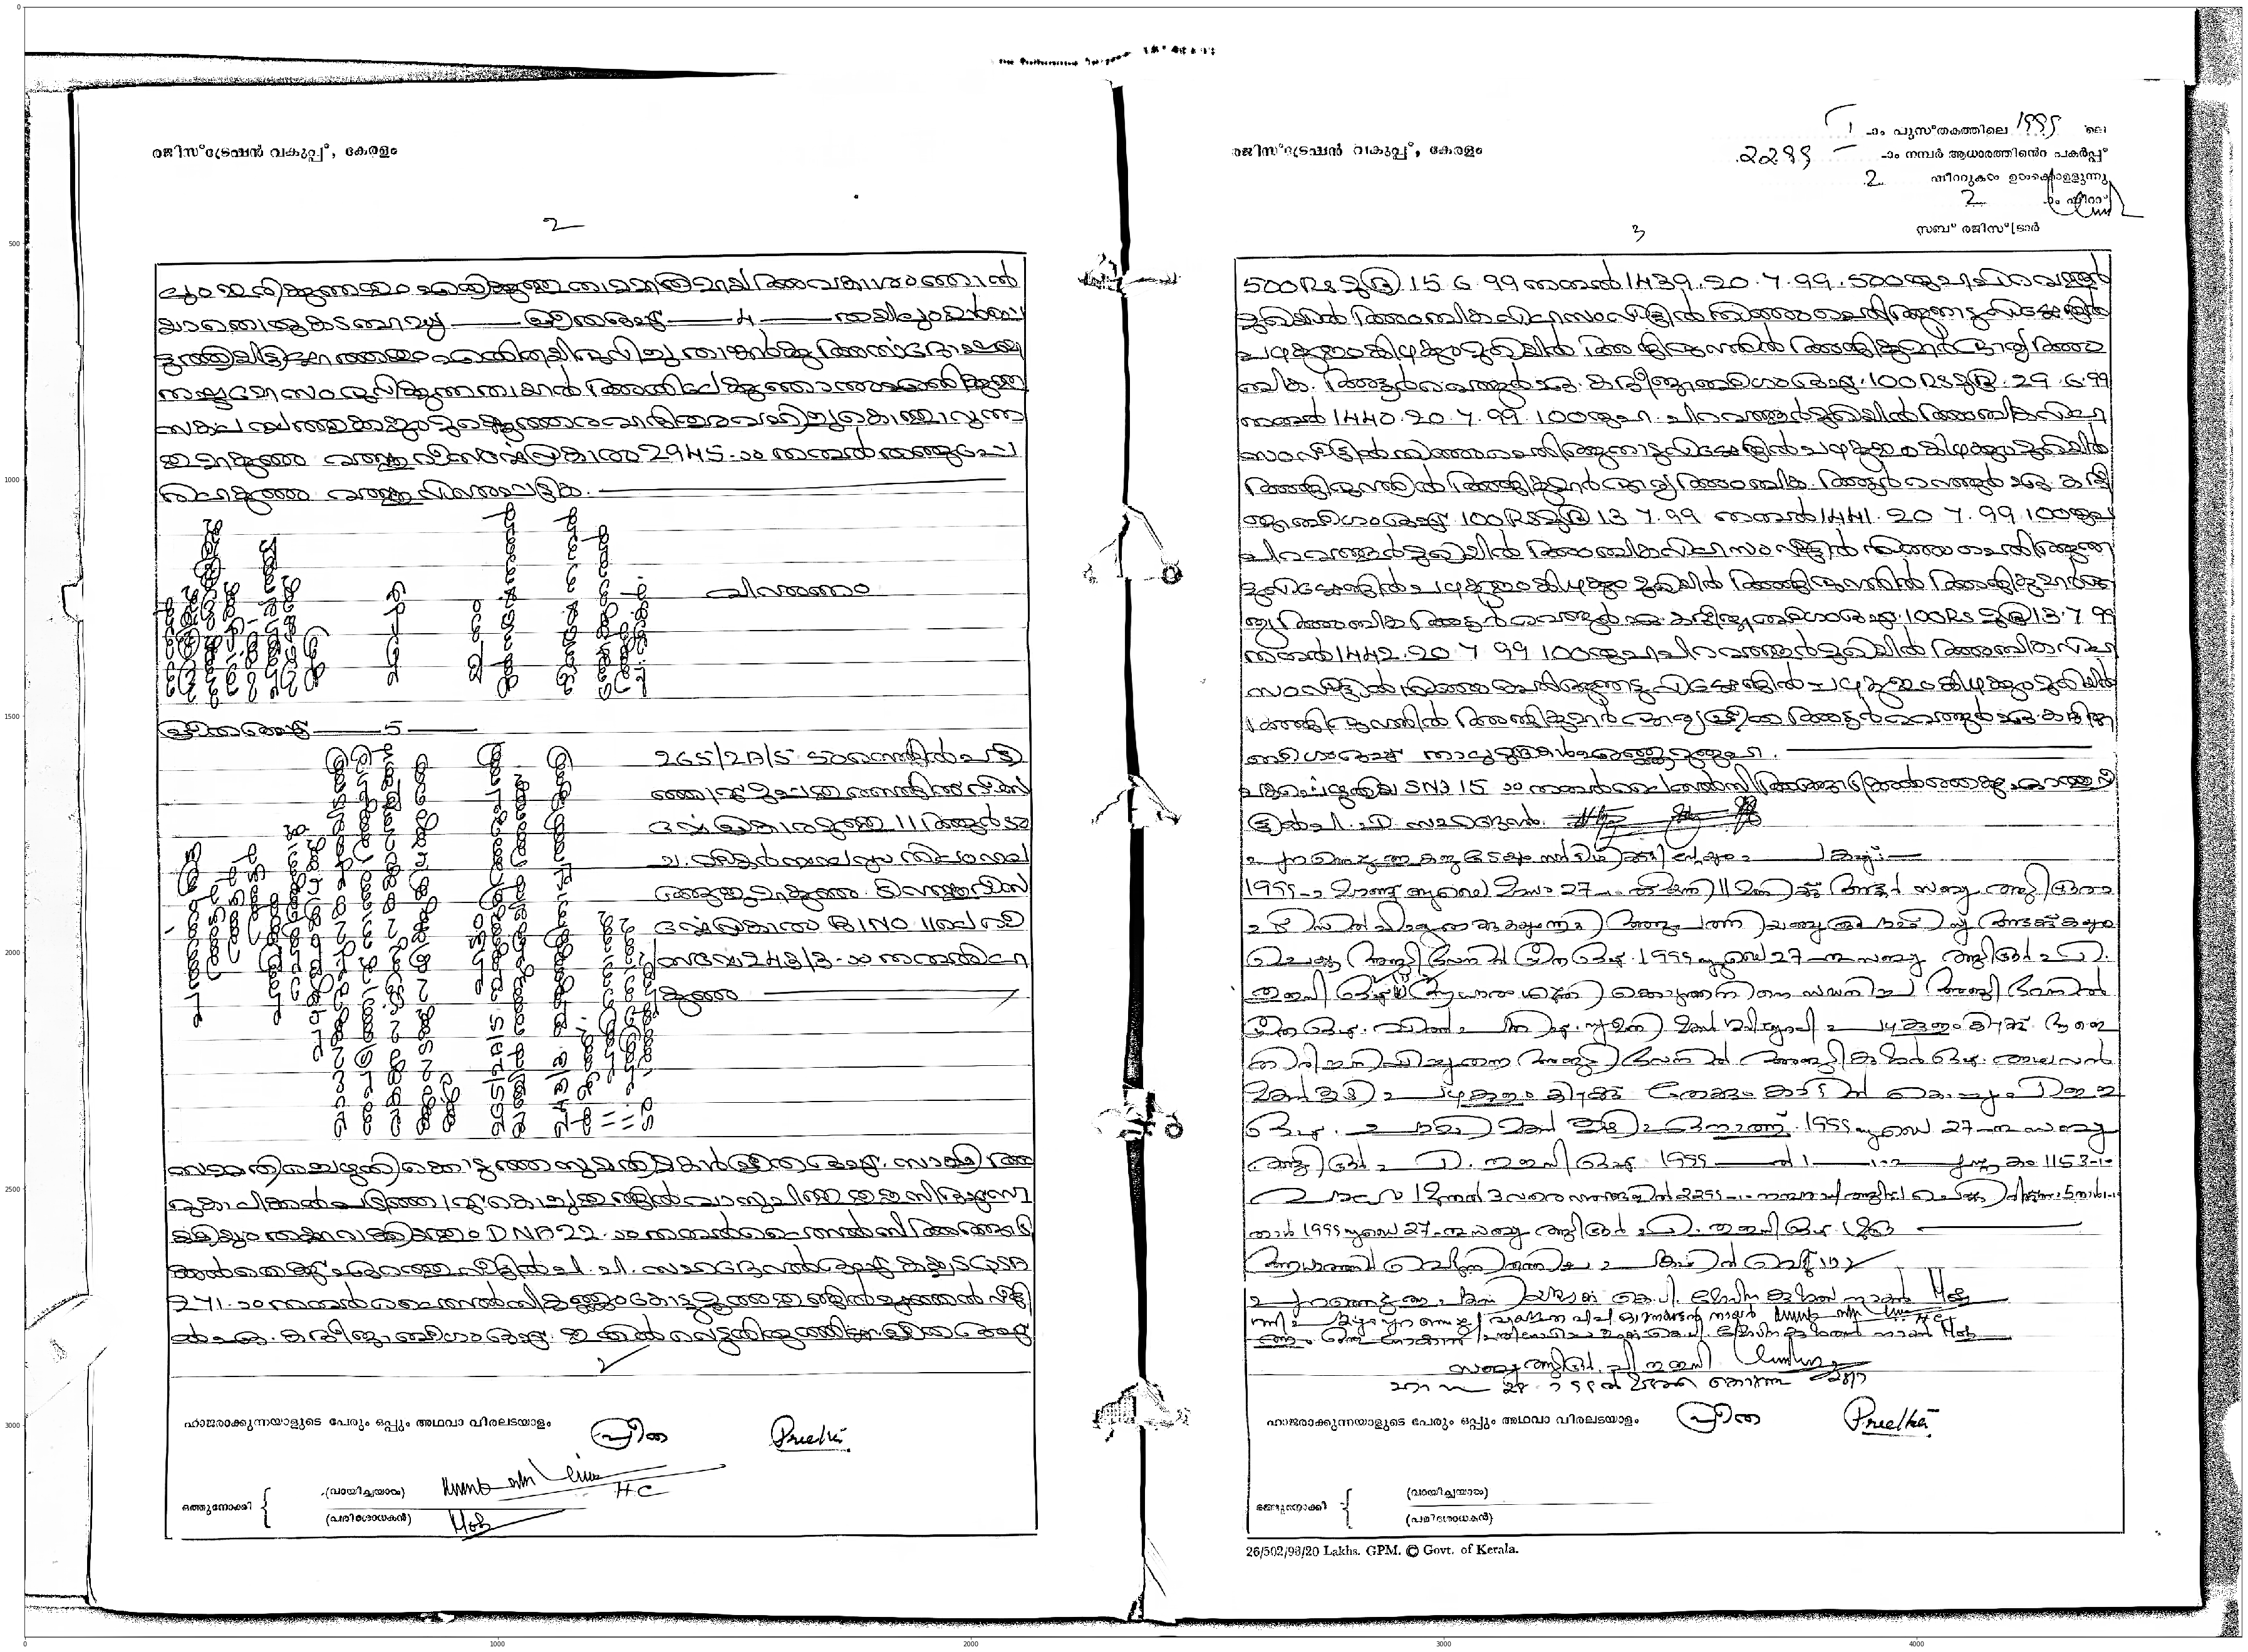

In [7]:
fig = plt.figure(figsize=figsize)
dst = cv2.fastNlMeansDenoising(grey,None,30,21,81)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

In [8]:
cv2.imwrite('denoised.jpg', dst)

True

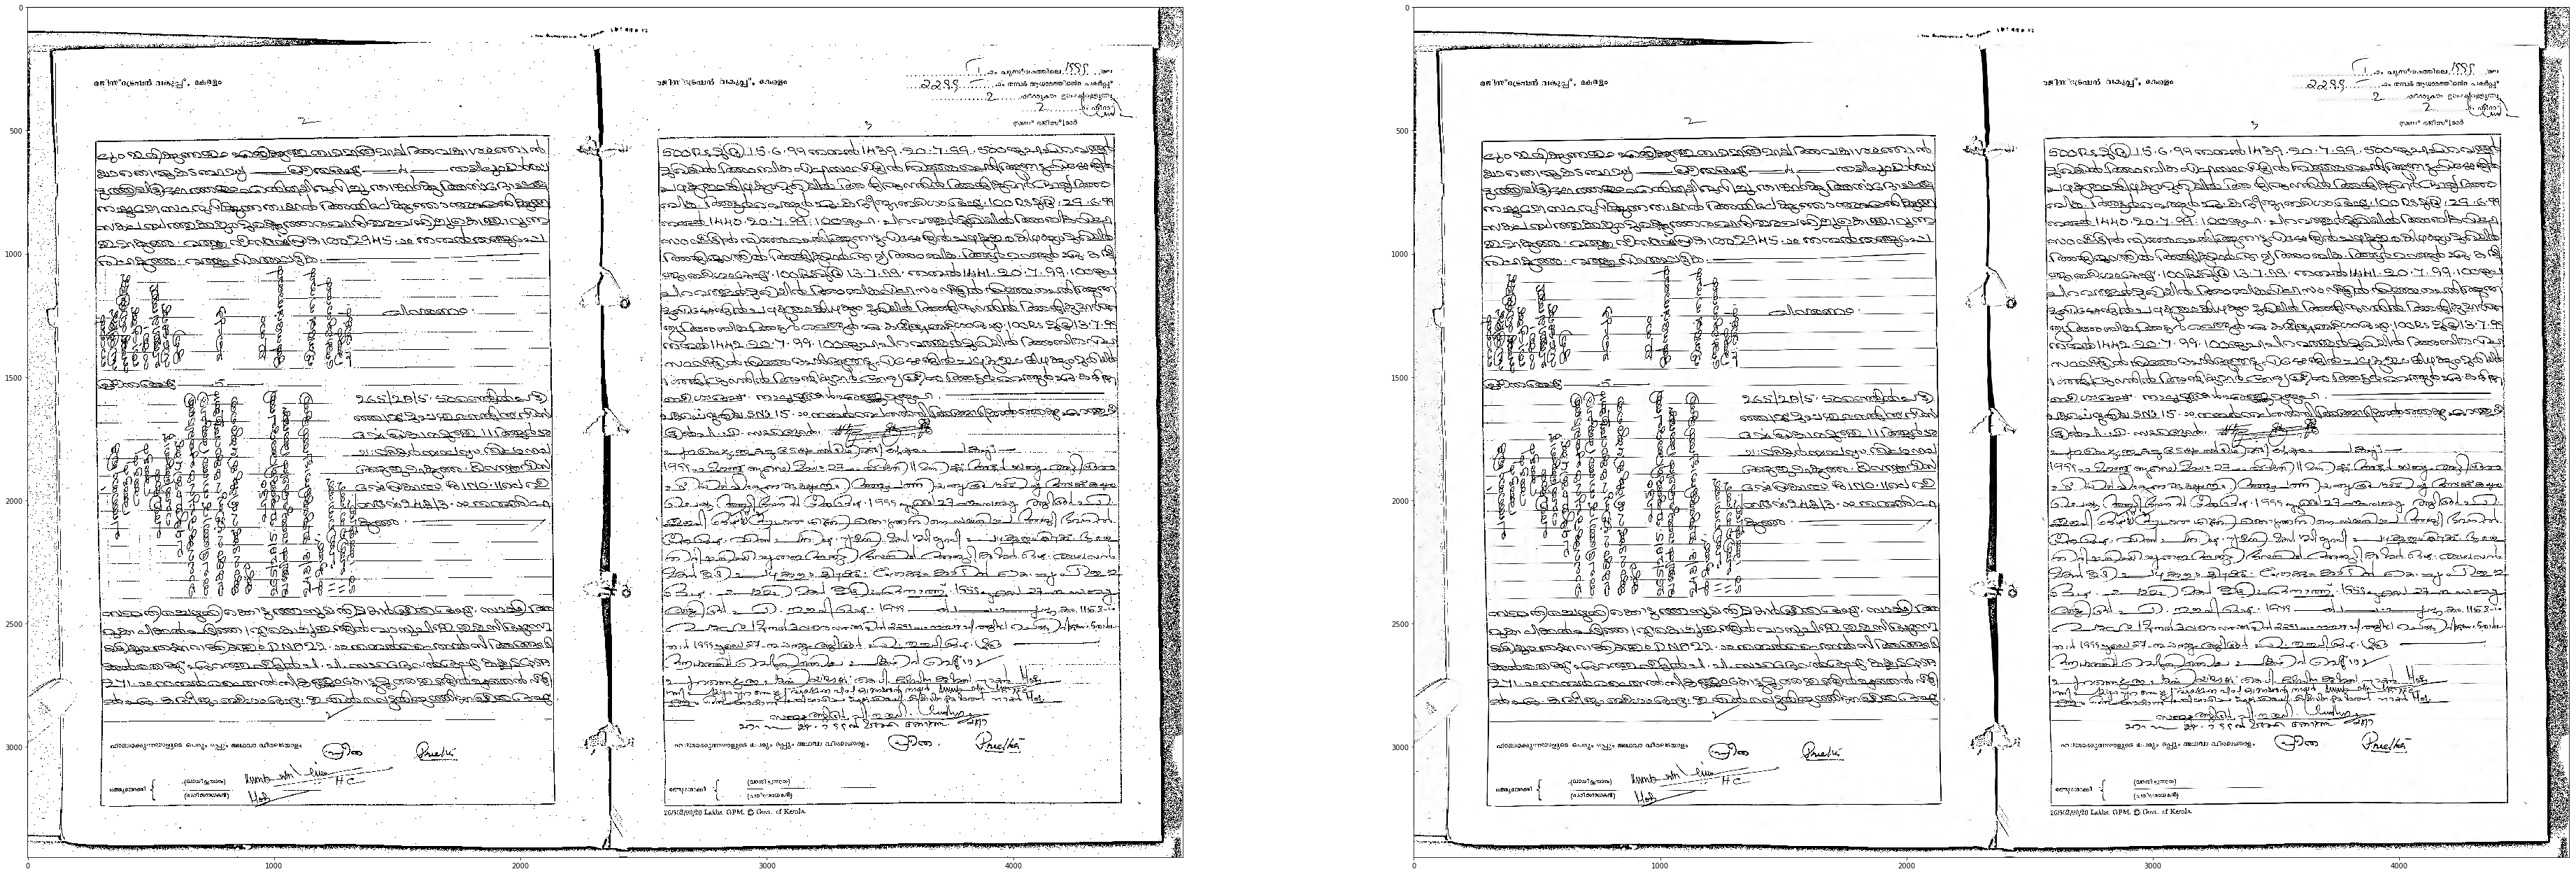

In [11]:
#Side by side comparison of original image & denoised image

f = plt.figure(figsize=figsize)
f.add_subplot(1,2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
f.add_subplot(1,2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show(block=True)

